In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

import imp
imp.reload(wind)
import wind

import transdist

NameError: name 'wind' is not defined

In [ ]:
import gmaps
import os
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
#import json



In [15]:
import geopandas as gpd
from shapely.geometry import Point
usa_gpd = gpd.read_file('maps/states_21basic/states.shp')
ca_gpd = usa_gpd[usa_gpd.STATE_ABBR == 'CA']
ca_gpd

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [96]:
from shapely.geometry import Polygon
def in_multipoly(pt,mp):
    for p in mp:
        if pt.within(p):
            return True
    return False
def in_states(latlon,usa_gpd,states):
    pt = Point(*latlon[::-1])
    if type(states) == str:
        if states == 'all':
            states = usa_gpd.STATE_ABBR
    for state in states:
        state_geo = usa_gpd[usa_gpd.STATE_ABBR == state]['geometry'].iloc[0]
        if type(state_geo) == Polygon:
            if pt.within(state_geo):
                return True
        else:
            if in_multipoly(pt,state_geo):
                return True
    return False

In [125]:
grid_div = 20
#lat_range = np.linspace(32.5,transdist.MAX_LAT,grid_div)
#lon_range = np.linspace(-118.5,-114,grid_div)
lat_range = np.linspace(32.5,42,grid_div)
lon_range = np.linspace(-125.5,-113.5,grid_div)
point_grid = np.meshgrid(lat_range,lon_range,indexing='ij')
grid_point_list = [(lat,lon) for lat,lon in zip(point_grid[0].ravel(),point_grid[1].ravel())]
#filter out points not in states
grid_point_list = [pt for pt in grid_point_list if in_states(pt,usa_gpd,['CA'])]
print(len(grid_point_list))
grid_layer = gmaps.symbol_layer(
    grid_point_list, fill_color="red", stroke_color="red", scale=3
)

132


In [126]:
fig = gmaps.figure(
    layout={
        'width': '800px',
        'height': '600px',
    })
fig.add_layer(grid_layer)
fig

Figure(layout=FigureLayout(height='600px', width='800px'))

In [8]:
nrel = wind.setup_nrel()

In [10]:
features = ['elevation','mean_wind_speed','mean_cubed_wind_speed',
            'temperature','pressure','precipitation']

In [127]:
wind.latlon_to_features(nrel,grid_point_list[0],features)

array([9.86679001e+01, 4.49193859e+00, 1.92550323e+02, 2.87996063e+02,
       9.94968906e+04, 1.06606055e-02])

In [145]:
# carefully append data to list in case we hit request limit
data_list = []
for i in range(len(grid_point_list)):
    latlon = grid_point_list[i]
    data_list.append((i,wind.latlon_to_features(nrel,latlon,features)))
#%time data_arr = np.array([wind.latlon_to_features(nrel,latlon,features) for latlon in grid_point_list[:]])

OSError: Error retrieving data: 429

In [146]:
i

69

In [130]:
for fname in ['temperature','pressure','precipitation']:
    data_df[fname] = data_df[fname].apply(np.mean)

In [129]:
data_df = pd.DataFrame(data_arr,columns=features)
data_df

,elevation,mean_wind_speed,mean_cubed_wind_speed,temperature,pressure,precipitation
0,131.063,2.65423,44.8592,"[284.69345, 283.903, 283.5246, 283.18582, 282....","[99445.48, 99493.086, 99531.54, 99553.516, 995...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,962.194,5.34722,647.643,"[278.2998, 277.4911, 275.5318, 275.46158, 276....","[89457.69, 89494.31, 89510.79, 89531.84, 89545...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,172.476,8.43202,2353.55,"[285.00168, 284.9376, 284.6141, 284.81857, 284...","[99065.52, 99080.17, 99089.33, 99121.375, 9914...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0.251643,4.96757,376.438,"[286.6558, 286.3109, 286.3567, 283.28043, 285....","[101032.14, 101033.97, 101052.28, 101089.81, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,43.5878,5.8915,459.211,"[285.95386, 285.63037, 285.26108, 284.8552, 28...","[100350.05, 100366.53, 100377.516, 100408.64, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
58,912.934,6.43867,682.426,"[277.4972, 277.3995, 277.09433, 277.27438, 276...","[90245.06, 90264.29, 90301.83, 90301.83, 90325...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
59,591.982,6.35781,617.166,"[279.90814, 279.72504, 279.51447, 279.50836, 2...","[93903.625, 93915.52, 93935.664, 93953.98, 939...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
60,228.573,4.50342,280.06,"[283.10037, 282.76773, 281.59583, 281.58362, 2...","[98060.24, 98087.71, 98087.71, 98114.266, 9815...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
61,433.672,6.31017,657.275,"[282.27332, 282.12378, 280.5826, 280.8115, 281...","[95901.37, 95934.33, 95945.31, 95969.12, 95983...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [131]:
data_df

,elevation,mean_wind_speed,mean_cubed_wind_speed,temperature,pressure,precipitation
0,131.063,2.65423,44.8592,289.999939,98799.789062,0.014423
1,962.194,5.34722,647.643,289.528931,89176.468750,0.036162
2,172.476,8.43202,2353.55,297.347534,98230.382812,0.008779
3,0.251643,4.96757,376.438,297.924500,100108.132812,0.015677
4,43.5878,5.8915,459.211,297.410400,99469.460938,0.007525
...,...,...,...,...,...,...
58,912.934,6.43867,682.426,291.340363,89878.382812,0.011288
59,591.982,6.35781,617.166,293.850128,93323.195312,0.013587
60,228.573,4.50342,280.06,296.237823,97280.054688,0.008570
61,433.672,6.31017,657.275,295.244080,95261.218750,0.008570


cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan


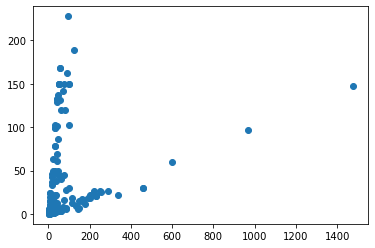

In [15]:
def parse_cap_col(s):
    try:
        return float(str(s)[:-3])
    except:
        return np.nan
#filter by state (state abbrev is always at end of 'Place')
def filter_state(place,state):
    try:
        if place[-1] == ' ':
            print('bad')
        return place[-2:] == state
    except:
        print('cannot parse ',place)
        return False


all_farms = pd.read_csv('data/openei-wind-farm-sites.csv')
ca_farms = all_farms[all_farms['Place'].apply(lambda x: filter_state(x,'CA'))]\
    .copy().reset_index() #make this a new df
plt.scatter(ca_farms['NumberOfUnits'],ca_farms['GeneratingCapacity'].apply(parse_cap_col))

In [6]:
#pd.read_csv('data/openei-wind-farm-sites.csv')[['Facility Name','GeneratingCapacity','NumberOfUnits','Coordinates']].to_csv('data/cal-farms.csv')

In [2]:
#swp_df = pd.read_pickle('data/select-wind-power-0607.pkl')
swp_df = pd.read_csv('data/openei-wind-farm-sites.csv')
def parse_coords(in_s):
    try:
        s_list = str(in_s).split(',')
        return  [float(s[:-1]) for s in s_list]
    except:
        print('cannot parse ',in_s)
        return [np.nan,np.nan]
#filter by state (state abbrev is always at end of 'Place')
def filter_state(place,state):
    try:
        if place[-1] == ' ':
            print('bad')
        return place[-2:] == state
    except:
        print('cannot parse ',place)
        return False
swp_df['latitude'], swp_df['longitude'] = list(zip(*swp_df['Coordinates'].apply(parse_coords)))
swp_df = swp_df[swp_df['Place'].apply(lambda x: filter_state(x,'CA'))]\
    .copy().reset_index() #make this a new df
swp_df = swp_df[['latitude','longitude']].dropna()
swp_df

cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan


,latitude,longitude
0,35.0861,-118.3533
1,33.7436,-115.9925
2,35.0406,-118.2994
3,35.0192,-118.3031
4,35.0192,-118.3031
...,...,...
161,33.8003,-118.3089
162,34.9994,-118.2911
163,33.9111,-116.5619
164,37.7347,-121.6519


In [134]:
from geopy.distance import distance
def min_farm_dist(latlon,swp_df):
    return np.min([distance(latlon,(lat1,lon1)) for lat1,lon1 in zip(swp_df['latitude'],swp_df['longitude'])])

In [142]:
data_df['farm_dist'] = [min_farm_dist(latlon,swp_df).miles for latlon in grid_point_list]

ValueError: Length of values does not match length of index

In [74]:
data_df

,elevation,mean_wind_speed,mean_cubed_wind_speed,temperature,pressure,precipitation,farm_dist
0,131.063,2.65423,44.8592,289.999939,98799.789062,0.014423,37.806022
1,962.194,5.34722,647.643,289.528931,89176.468750,0.036162,8.743304
2,172.476,8.43202,2353.55,297.347534,98230.382812,0.008779,19.426089
3,0.251643,4.96757,376.438,297.924500,100108.132812,0.015677,48.547847
4,43.5878,5.8915,459.211,297.410400,99469.460938,0.007525,77.673660
...,...,...,...,...,...,...,...
58,912.934,6.43867,682.426,291.340363,89878.382812,0.011288,36.387067
59,591.982,6.35781,617.166,293.850128,93323.195312,0.013587,50.259698
60,228.573,4.50342,280.06,296.237823,97280.054688,0.008570,71.894672
61,433.672,6.31017,657.275,295.244080,95261.218750,0.008570,97.220627


In [76]:
X = pd.concat([
    data_df[features],
],axis=1)
#y = df['per_turb_cap_frac']
y = data_df['farm_dist']

In [77]:
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.inspection import permutation_importance
score_funs = {
    'explained_variance' : explained_variance_score,
    'r2' : r2_score
}
#test a model and print/plot testing results
def test_model(model,X,y, random_state = 0, score = 'explained_variance'):
    score_fun = score_funs[score]
    
    #split the data into training / testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= random_state)
    #X_train = normalize(X_train)
    #X_test = normalize(X_test)
    #cross validate with f1 scores
    scores = cross_val_score(model,X_train,y_train,scoring = score)

    print('cross validation scores:', scores)
    print('mean,std',np.mean(scores),np.std(scores))
    #fit data and compare scores for training and testing data
    model = model.fit(X_train, y_train)
    
    print("training data")
    y_pred = model.predict(X_train)
    print(score_fun(y_train, y_pred))
    
    print("testing data")
    y_pred = model.predict(X_test)
    print(score_fun(y_test, y_pred))
    
    #plot confusion matrix and permutation importances
#     fig, (cm_ax,pi_ax) = plt.subplots(1,2,figsize=(18,5))

#     plot_confusion_matrix(model,X_test,y_test,ax=cm_ax,normalize='true')
#     cm_ax.set_title('confusion matrix')
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=random_state, n_jobs=1)
    sorted_idx = result.importances_mean.argsort()
    
    fig, ax = plt.subplots(figsize=(18,5))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=X_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    
    fig.tight_layout()
    plt.show()
    
    return model #returns fitted estimator

cross validation scores: [ 0.33718248  0.06153838  0.70975783 -1.10938099  0.51618378]
mean,std 0.1030562987699903 0.6426980705353514
training data
0.9262072582332309
testing data
0.16794060731344862


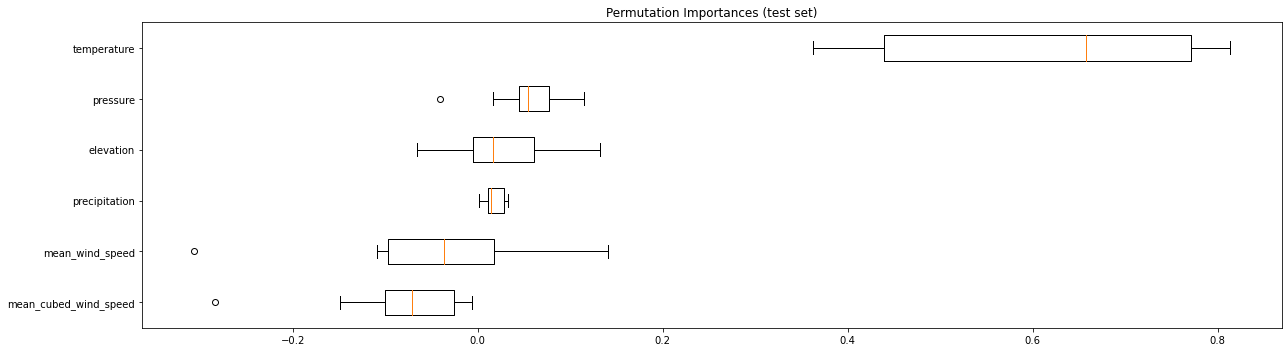

In [79]:
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
model = test_model(model,X,y,score = 'r2',random_state=0)